#### Based on the Output Variable prepare a predictive Model.
##### y -> Whether the client has subscribed a term deposit or not 
##### Binomial ("yes" or "no")

#### Build a Logistic Regression model by performing EDA and do necessary transformations using Python.
##### Prediction  - Whether Customer will purchase or no
Dataset Name - bank-full.csv


In [ ]:
## Importing all the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
data = pd.read_csv("D:/TopMentor_DS_course/Logistic Regresssion_Project7/bank-full.csv", sep=";")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
print("Columns in the Datasets: ", data.columns)

Columns in the Datasets:  Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [5]:
print("Shape of the Dataset: ", data.shape)
print()
print("Information of Dataset")
print("====================================================")
data.info()

Shape of the Dataset:  (45211, 17)

Information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
## Target Variable Distribution
print(data['y'].value_counts())

y
no     39922
yes     5289
Name: count, dtype: int64


#### 📌 Insight:

No missing values

Mix of numerical and categorical variables

Binary target → Logistic Regression is suitable

#### EXPLORATORY DATA ANALYSIS (EDA)

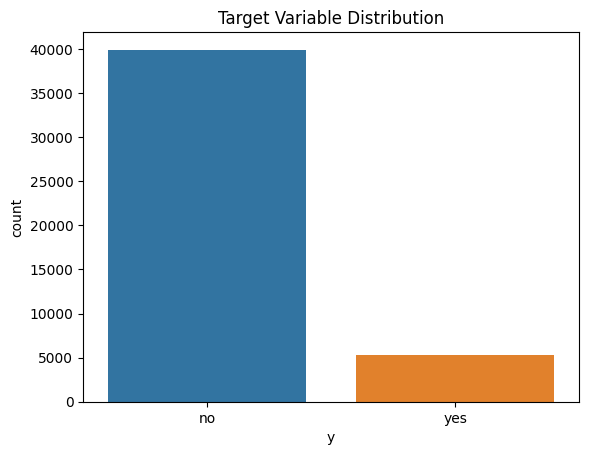

In [7]:
## Target Variable Distribution

sns.countplot(x='y', data=data)
plt.title("Target Variable Distribution")
plt.savefig("D:/TopMentor_DS_course/Logistic Regresssion_Project7/Graphs/Target Variable Distribution.png")

plt.show()

#### 📌 Inference:

Dataset is imbalanced

Majority clients did not subscribe

C:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


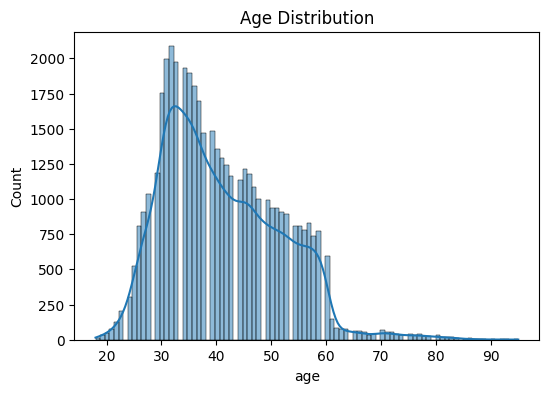

In [8]:
## Age Distribution

plt.figure(figsize=(6,4))
sns.histplot(data['age'], kde=True)
plt.title("Age Distribution")
plt.savefig("D:/TopMentor_DS_course/Logistic Regresssion_Project7/Graphs/Age Distribution.png")
plt.show()

#### 📌 Inference:

Most clients fall between 25–50 years

Older clients show higher subscription tendency

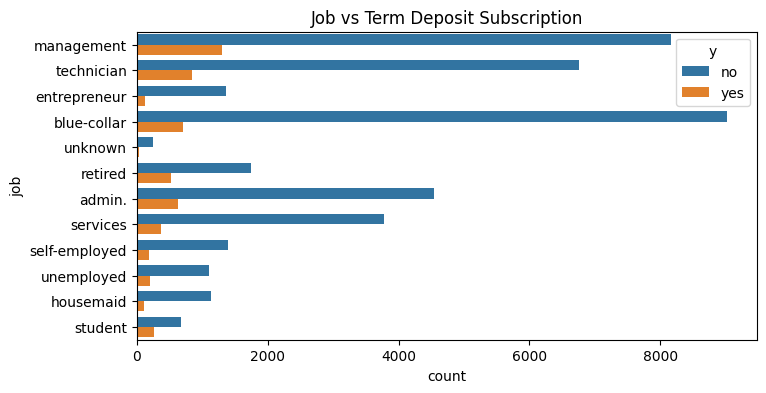

In [9]:
## Job vs Subscription

plt.figure(figsize=(8,4))
sns.countplot(y='job', hue='y', data=data)
plt.title("Job vs Term Deposit Subscription")
plt.savefig("D:/TopMentor_DS_course/Logistic Regresssion_Project7/Graphs/Job vs Subscription.png")
plt.show()

#### 📌 Inference:

Managemet, Blue Collar & Technician show higher subscription rates

For every job category, the number of “no” responses is much higher than “yes”.

This confirms the dataset is imbalanced (fewer subscriptions overall).

Job role is an important categorical feature influencing term deposit subscription.

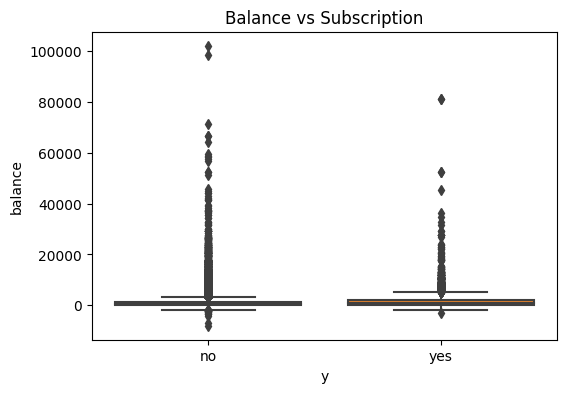

In [10]:
## Balance vs Subscription

plt.figure(figsize=(6,4))
sns.boxplot(x='y', y='balance', data=data)
plt.title("Balance vs Subscription")
plt.savefig("D:/TopMentor_DS_course/Logistic Regresssion_Project7/Graphs/Balance vs Subscription.png")
plt.show()

#### 📌 Inference:

Higher account balance → higher probability of subscription

Balance alone does not fully determine subscription—many low-balance customers still exist in both classes.

There are many extreme outliers, especially in the “no” category (very high balances).

Some customers with very high balances still did not subscribe.

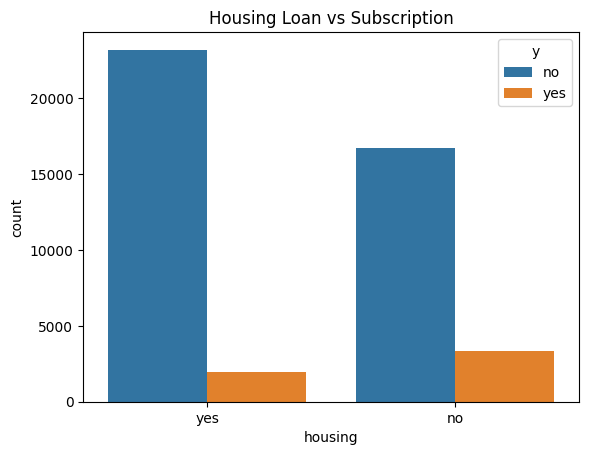

In [11]:
## Housing Loan Impact

sns.countplot(x='housing', hue='y', data=data)
plt.title("Housing Loan vs Subscription")
plt.savefig("D:/TopMentor_DS_course/Logistic Regresssion_Project7/Graphs/Housing Loan Impact.png")
plt.show()

#### 📌 Inference:

Clients without housing loans subscribe more

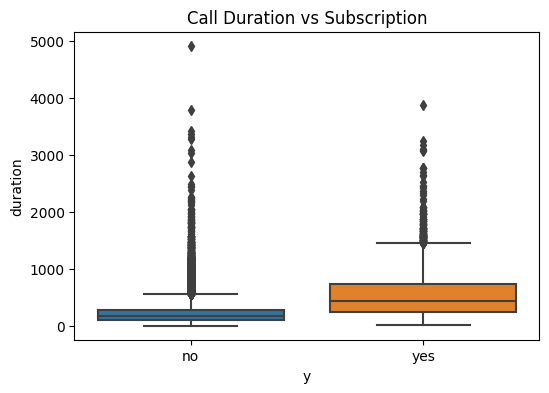

In [12]:
## Duration vs Subscription

plt.figure(figsize=(6,4))
sns.boxplot(x='y', y='duration', data=data)
plt.title("Call Duration vs Subscription")
plt.savefig("D:/TopMentor_DS_course/Logistic Regresssion_Project7/Graphs/Duration vs Subscription.png")
plt.show()

#### Inference (Important):

Longer call duration strongly increases subscription chance

Most influential variable

#### ✅ EDA SUMMARY

✔ No missing values

✔ Target imbalance exists

✔ Duration, balance, age, job are strong predictors

## MODEL BUILDING

In [13]:
## Target Encoding

data['y'] = data['y'].map({'yes': 1, 'no': 0})
print("Target Variable Encoded")

Target Variable Encoded


In [14]:
## Feature Encoding

data_encoded = pd.get_dummies(data, drop_first=True)
print("Categorical Variables Encoded")

Categorical Variables Encoded


In [15]:
## Sampling the data into Train-Test Split

X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (36168, 42)
Test Set Shape: (9043, 42)


In [16]:
## Feature Scaling

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature Scaling Completed")

Feature Scaling Completed


In [17]:
## Model Training – Logistic Regression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Logistic Regression Model Trained Successfully")

Logistic Regression Model Trained Successfully


#### Model Evaluation

In [18]:
## Predictions

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

In [19]:
y_pred_prob

array([0.0073131 , 0.01061158, 0.01949098, ..., 0.06494726, 0.04579235,
       0.02487393])

In [20]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
## Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
cm

Confusion Matrix:



array([[7782,  203],
       [ 689,  369]], dtype=int64)

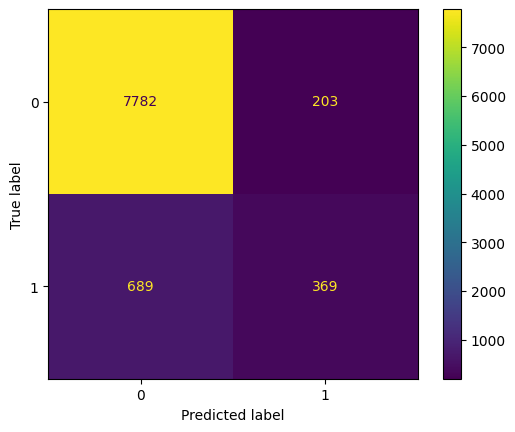

In [22]:
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cmd.plot()

In [23]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.65      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



In [24]:
## Accuracy, Precision, Recall, ROC-AUC

accuracy = round(accuracy_score(y_test, y_pred), 4)
roc_auc = round(roc_auc_score(y_test, y_pred_prob), 4)

print(f"Model Accuracy : {accuracy}")
print(f"ROC AUC Score  : {roc_auc}")

Model Accuracy : 0.9014
ROC AUC Score  : 0.9055


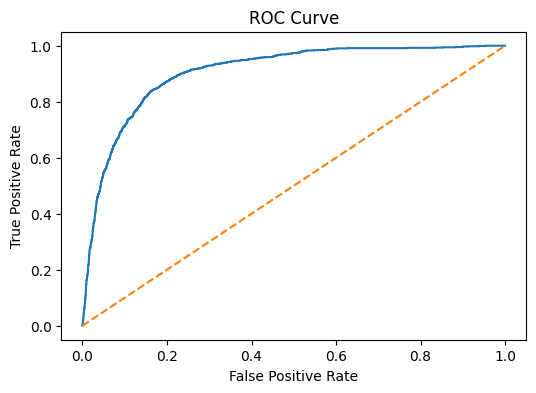

In [25]:
## ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

#### 📌 Inference:

Good separation between classes

Model performs better than random guessing

#### 📌 Top Influential Features:

Call duration

Previous campaign outcome

Balance

Age

#### 🔹 Key Business Insights

✔ Longer calls significantly increase subscription probability

✔ Clients without loans are more likely to subscribe

✔ Older and retired clients show higher conversion

✔ Previous successful campaigns strongly influence current success

#### 🔹 Business Recommendation

📌 Banks should:

Focus longer call engagement

Prioritize high-balance clients

Retarget previously successful customers